In [1]:
from read import *

In [2]:
DF = df_gen('weibo_train_data.txt')

skiped 4130
skiped 12314
skiped 16461
skiped 24673
skiped 28778
skiped 45304
skiped 49437
skiped 53568
skiped 57672
skiped 61802
skiped 65934
skiped 70008
skiped 74140
skiped 78287
skiped 82404
skiped 86497
skiped 90600
skiped 107136
skiped 111269
skiped 131820
skiped 135952
skiped 156546
skiped 160630
skiped 164768
skiped 168957
skiped 173125
skiped 193745
skiped 197842
skiped 202014
skiped 218472
skiped 222600
skiped 226738
skiped 230897
skiped 239211
skiped 243357
skiped 259850
skiped 263936
skiped 284550
skiped 288644
skiped 292803
skiped 301095
skiped 305193
skiped 329825
skiped 333941
skiped 346328
skiped 350422
skiped 354570
skiped 358716
skiped 387407
skiped 391526
skiped 395622
skiped 408021
skiped 412134
skiped 416282
skiped 420362
skiped 428590
skiped 432644
skiped 444972
skiped 449078
skiped 453210
skiped 490279
skiped 494373
skiped 506710
skiped 510835
skiped 543829
skiped 547999
skiped 585004
skiped 589079
skiped 605563
skiped 609697
skiped 634258
skiped 638387
skiped 646

In [109]:
df = DF
df.head(5)

,comment_count,content,forward_count,like_count,mid,time,uid
0,0,丽江旅游(sz002033)#股票##炒股##财经##理财##投资#推荐包赢股，盈利对半分成...,0,0,7d45833d9865727a88b960b0603c19f6,2015-02-23 17:41:29,d38e9bed5d98110dc2489d0d1cac3c2a
1,0,#丁辰灵的红包#挣钱是一种能力，抢红包拼的是技术。我抢到了丁辰灵 和@阚洪岩 一起发出的现金...,0,0,8169f1d45051e08ef213bf1106b1225d,2015-02-14 12:49:58,fa13974743d3fe6ff40d21b872325e9e
2,0,淘宝网这些傻逼。。。气的劳资有火没地儿发~尼玛，你们都瞎了,0,0,68cd0258c31c2c525f94febea2d9523b,2015-03-31 13:58:06,da534fe87e7a52777bee5c30573ed5fd
3,4,看点不能说的，你们都懂[笑cry],0,3,00b9f86b4915aedb7db943c54fd19d59,2015-06-11 20:39:57,e06a22b7e065e559a1f0bf7841a85c51
4,0,111多张,0,0,c7f6f66044c0c5a3330e2c5371be6824,2015-03-10 18:02:38,f9828598f9664d4e347ef2048ce17734


In [110]:
import pandas as pd
import jieba
df.shape

(2425943, 7)

In [111]:
df_label = pd.concat([df.comment_count,df.forward_count,df.like_count],axis=1)

In [112]:
df_X = df
df_X = df_X.drop(columns = "comment_count")
df_X = df_X.drop(columns = "like_count")
df_X = df_X.drop(columns = "forward_count")

In [113]:
from sklearn import cross_validation
df_X,x_train, df_label, y_test = cross_validation.train_test_split(df_X, df_label, test_size=0.999, random_state=0)

In [114]:
df_X.shape

(2425, 4)

In [115]:
# 引入中文停用词
stpwrd_dic = open("stop_words.txt", 'rb')
stpwrd_content = stpwrd_dic.read()
stpwrd_content = stpwrd_content.decode('utf-8')
#将停用词表转换为list  
stpwrdlst = stpwrd_content.splitlines()
stpwrdlst = list(map(lambda x: x.strip(), stpwrdlst))
stpwrd_dic.close()


In [116]:
# 定义分词函数
def context_chop(context):
    word = " "
    list_ = jieba.lcut(context)
    for each in list_:       
        if each not in stpwrdlst:
            word+=" "+each
    return word

In [117]:
# 对content列所有entry执行分词
df_X["cutted_content"] = df_X.content.apply(context_chop)

In [118]:
## ----模型提提升---- ##
def iteraction(content):
    return content.count('#')/2 + content.count('@')
df_X["interaction"] = df_X.content.apply(iteraction)

In [119]:
## ----模型提提升---- ##
from snownlp import SnowNLP
def senti(content):
    s = SnowNLP(content).sentiments
    return s
df_X["sensitive"] = df_X.content.apply(senti)
df_X.head(5)

,content,mid,time,uid,cutted_content,interaction,sensitive
1310795,然后我几个小时之前看了《About time》这部电影，发现主题曲就是这首歌，感觉很好。现在...,e0892171e0a5f1253384448d668e21cd,2015-03-20 01:16:28,493b4db0627a6b6ca5ddc475a0688a3e,几个 小时 About time 这部 电影 发现 主题曲 首歌 感觉 状态 享受 ...,1.0,0.999993
584077,发表了博文《推荐一本书【一课经济学】》ByJSC_Blue最近在看一本经典的经济学入门数据，...,aa0dfc77cead179bb492abb376ac5d67,2015-04-30 21:37:04,b490b5dc3da6fb996af0512e9945b0d2,发表 博文 推荐 本书 一课 经济学 ByJSC Blue 一本 经典 经济学 入门 数...,0.0,1.000000
642787,不就写代码儿么，在哪儿不能写，开心最好,9b0fc6510dafa91d44f13811156b081d,2015-04-17 22:07:11,8935fc324772cdce21a891ac23571391,写 代码 写 开心,0.0,0.909217
185248,下班了～[泪],4bcc2f87b36a13afa21e150c1ccd4fd1,2015-05-18 05:56:28,da4c81d05820cc1692c23a09bd7bbb6d,下班 泪,0.0,0.934278
1919537,男子举报公务员与妻通奸 装定位仪捉奸 找到证据后就说不知道如何开口？呵呵 http://t....,13b7eba9cf8e88a76a49670c6bf5f6cb,2015-05-09 22:04:36,0cdf1500af3ad5afb787d432d0c25dd8,男子 举报 公务员 妻 通奸 装 定位仪 捉奸 找到 证据 说 开口 RAe...,0.0,0.053804


In [120]:
df_X = df_X.reset_index(drop=True)
df_label = df_label.reset_index(drop=True)
df_X.head(5)

,content,mid,time,uid,cutted_content,interaction,sensitive
0,然后我几个小时之前看了《About time》这部电影，发现主题曲就是这首歌，感觉很好。现在...,e0892171e0a5f1253384448d668e21cd,2015-03-20 01:16:28,493b4db0627a6b6ca5ddc475a0688a3e,几个 小时 About time 这部 电影 发现 主题曲 首歌 感觉 状态 享受 ...,1.0,0.999993
1,发表了博文《推荐一本书【一课经济学】》ByJSC_Blue最近在看一本经典的经济学入门数据，...,aa0dfc77cead179bb492abb376ac5d67,2015-04-30 21:37:04,b490b5dc3da6fb996af0512e9945b0d2,发表 博文 推荐 本书 一课 经济学 ByJSC Blue 一本 经典 经济学 入门 数...,0.0,1.000000
2,不就写代码儿么，在哪儿不能写，开心最好,9b0fc6510dafa91d44f13811156b081d,2015-04-17 22:07:11,8935fc324772cdce21a891ac23571391,写 代码 写 开心,0.0,0.909217
3,下班了～[泪],4bcc2f87b36a13afa21e150c1ccd4fd1,2015-05-18 05:56:28,da4c81d05820cc1692c23a09bd7bbb6d,下班 泪,0.0,0.934278
4,男子举报公务员与妻通奸 装定位仪捉奸 找到证据后就说不知道如何开口？呵呵 http://t....,13b7eba9cf8e88a76a49670c6bf5f6cb,2015-05-09 22:04:36,0cdf1500af3ad5afb787d432d0c25dd8,男子 举报 公务员 妻 通奸 装 定位仪 捉奸 找到 证据 说 开口 RAe...,0.0,0.053804


In [121]:
df_X.shape

(2425, 7)

In [122]:
df_label["comment_count"] = df_label["comment_count"].apply(int)
df_label["like_count"] = df_label["like_count"].apply(int)
df_label["forward_count"] = df_label["forward_count"].apply(int)

In [123]:
# 数据源中全零标签的比例
count = 0
for each in df_label.values:
    if sum(each) == 0:
        count += 1      
count/df_label.shape[0]

0.6379381443298969

In [124]:
from sklearn.feature_extraction.text import CountVectorizer

In [125]:
# 关键词提取和向量转换
def vectorize(df_X):
    tf_vectorizer = CountVectorizer()
    tf = tf_vectorizer.fit_transform(df_X.cutted_content)
    return tf,tf_vectorizer


In [126]:
from sklearn.decomposition import LatentDirichletAllocation

In [127]:
# ----------可调参数:主题个数-------------
n_topics = 10

In [706]:
def lda_score(n_topics,tf):
    lda = LatentDirichletAllocation(n_components=n_topics, max_iter=10,learning_method='online')
    lda.fit(tf)
    output = lda.perplexity(tf)
    return output

In [128]:
df_X_tf,df_X_vector = vectorize(df_X)
# df_cad_tf,df_cad_vector = vectorize(df_cad)

In [129]:
df_X_tf.shape

(2425, 14245)

In [324]:
n=[1,5,10,50,100,200]
score=[]
for i in n:
    print(i)
    s = lda_score(i,df_X_tf)
    print (s)
    score.append(s)

1
9627.90675061
5
10447.926457
10
11316.3101423
50
13528.5520138
100
16788.2022231
200


Process ForkPoolWorker-1333:
Process ForkPoolWorker-1334:
Process ForkPoolWorker-1340:
Process ForkPoolWorker-1332:
Process ForkPoolWorker-1336:
Process ForkPoolWorker-1331:
Process ForkPoolWorker-1342:
Process ForkPoolWorker-1341:
Process ForkPoolWorker-1330:
Process ForkPoolWorker-1337:
Process ForkPoolWorker-1329:
Process ForkPoolWorker-1338:
Process ForkPoolWorker-1343:
Process ForkPoolWorker-1344:
Process ForkPoolWorker-1335:
Process ForkPoolWorker-1339:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.6.5/Framewo

  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/pool.py", line 125, in worker
    put((job, i, result))
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/pool.py", line 125, in worker
    put((job, i, result))
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/pool.py", line 125, in worker
    put((job, i, result))
  File "/usr/local/lib/python3.6/site-packages/sklearn/externals/joblib/pool.py", line 384, in put
    wlock_acquire()
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/pool.py", line 125, in worker
    put((job, i, result))
  File "/usr/local/lib/python3.6/site-packages/sklearn/exter

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(n, np.log(score),'b')
plt.xlabel("Topic Number")
plt.ylabel("Perplexity (log)")
plt.title("Topic Number - Preplexity Line Chart")
plt.savefig("topic_size.pdf",dpi = 100)
plt.show()

In [130]:
lda = LatentDirichletAllocation(n_topics=200, max_iter=50,learning_method='online')
X_docs = lda.fit_transform(df_X_tf)

/usr/local/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [131]:
X_docs.shape

(2425, 200)

In [24]:
# 打印top-word
def print_top_words(model, feature_names, n_top_words):
    #打印每个主题下权重较高的term
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
    #打印主题-词语分布矩阵
    print(model.components_)

In [759]:
# -----------可调参数:top word size------------------
n_top_words = 25

In [357]:
# 打印topic中关键词表
tf_feature_names = df_X_vector.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
糯米 红枣 少量 枣核 适中 软硬 挖出 去核 刀尖 一刀 加入适量 搓成 化开 条状 冰糖 塞入 桂花 小条 小火 揉成 raklqth 李洪基 只为 pid 中介
Topic #1:
挤眼 天堂 改签 3852693069997111 出行 暴雨 祝贺 编辑部 大礼 春寒 不明 裙子 rwzaqhv 生态圈 unitary 杀伤力 家居 泄露 实施 分支 争夺战 置身于 ra9lcry 我隐 看时
Topic #2:
菠萝 咕咾肉 rl73kty r2upxk0 treallyfindanyonewhowrotehow juniper default dynamic srx220 itreatedmyselfwithajunipersrx220andanex4200formyhomelab dns iwasgoogleingbutcouldn config 山间 同步 炮弹 美拍 说起 最快 永远 危机 娇羞 集释 吃点 deep
Topic #3:
春晚 阿里 不行 马云 重启 nice 不到 支撑 2x26 原点 东西 迪拜 平板 youtube 下场 cool 西溪 angular 牵手 巨星 耐心 悲剧 仰卧 是非 d版
Topic #4:
事件 馒头 前件 后件 锅里 无关 几下 蛋液 香葱 长者 包容 毕业典礼 彩虹 angry naive rwg5t8d 翻炒 调味 切小段 炒出 炒鸡蛋 香味 打散 炒过 出锅
Topic #5:
扮演 raoyy8e dota 各国 英雄 无冬 世界 分享 游戏 知乎 online 费伦 超多 勇猛 相赠 香水 魔幻 豪华 冒险 以柔克刚 千年 眼镜 一把 酸梅汤 所含
Topic #6:
源代码 明白 节操 迪奥 去核 272m 一行 大厨 rzz5rbt 加长版 hk 工人 禁用 一键 忙活 这帮 几年 leveldb 朝鲜战争 因素 oracle 开家 间隔 先来学 能量
Topic #7:
安安静静 没事 rom 等待 10g 户外运动 碰瓷 太远 发自内心 vhd 何能 rlyiia0 牙医 搞好 哈雷 vcard5 扭转 mou bru 颓废 题型 wif 常态 r2h0kvj rabfnyh
Topic #8:
ralutr7 希腊 ring 答卷 参与者 讲故事 厉害 某人 r

raecjva 再创新高 淘汰 rawtojd 3g 才华 顺丰 scratch 海姆 围观 万象 乱弹 raycx07 国语 sound 腾天 部件 zjicid2 私家车 乍一看 讲讲 拜耳 rlz5ixt 看点 cadreur
Topic #168:
100 单词 学习 打卡 扇贝 百词 认证 50 动画 资料 背单词 回来 斩学霸 css3 态度 演示 欲望 zwncofs 元素 词汇 篇文章 44 核心 raatgxg ccnp
Topic #169:
建设 团队 挑战 情况 研发 旅游 15 消费 拿到 体系 一周 部门 平台 工作 技术 身边 办法 cdn 摆放 小孩 提供 难度 遇上 员工 执着
Topic #170:
学院 环境 郑州大学 水利 一年 18 工业 团委 学生会 程序 教程 51cto 阳光 动态 培训 土豆 05 结构 维度 按钮 视频教程 形状 独家 分享 学期
Topic #171:
exceed 一会 网络空间 感染 14526 一共 rwai5rv 导师 rwmijps 春哥 农历 销量 罗振宇 豆丁 monitoring rwggj1i 闲人 r2raluv 发过 patching 真性情 标注 城墙 家庭主妇 小非
Topic #172:
模式 合作 酒店 业务 360 流量 定制 高效 链接 运营 经验 广告 联盟 高端 源码 信息化 搜索 上线 像是 界面 开通 重点 收益 战略 做成
Topic #173:
三联 godef 前瞻 某富 冲刺 组建 管不了 扫尘 辞职信 底子 dmg 电源 跨国企业 分析器 八月 推车 吴映洁 道理 只会 rzduzby 藕片 ramyqx7 ra6gylr 日日夜夜 em
Topic #174:
老鸭 赞食 客家话 ra2kss6 圣堂 开介 酒店 客家人 肉饼 业务 2015 几日 近些年来 势头 r2durqa 公司 粉丝汤 携程 高端 公布 第一 高星 市场 网发力 ceo
Topic #175:
翻看 要素 红木家具 iphone4 演讲 清肝 代理服务器 该项 帷帐 喝点 小组 捐款 raycx07 rahjzvt 构建 扫一扫 蓝色 再调 古典名著 excellent 基础理论 这门 经理人 引导 长假
Topic #176:
ppt 疏忽 制作者 pptstore 

In [358]:
# 可视化
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, df_X_tf, df_X_vector)


/usr/local/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


TypeError: Object of type 'complex' is not JSON serializable

PreparedData(topic_coordinates=           Freq  cluster  topics                      x  \
topic                                                     
105    5.643220        1       1    (0.254642486441+0j)   
153    5.491289        1       2    (0.279423002379+0j)   
58     4.532212        1       3    (0.249969365282+0j)   
100    4.524545        1       4     (0.25856012044+0j)   
68     3.446518        1       5    (0.228239447523+0j)   
115    3.439609        1       6    (0.234244914434+0j)   
85     3.255744        1       7    (0.226427635301+0j)   
42     2.969067        1       8    (0.224980370458+0j)   
150    2.946471        1       9    (0.242491445143+0j)   
165    2.592726        1      10    (0.230357081816+0j)   
113    2.553158        1      11    (0.211646887735+0j)   
69     2.275524        1      12    (0.230480290832+0j)   
50     2.147686        1      13    (0.196574389791+0j)   
25     2.093054        1      14    (0.201676316908+0j)   
71     2.069820        1 

In [132]:
col = []
for i in range(X_docs.shape[1]):
    s = "topic_"+str(i)
    col.append(s)
new_attri = pd.DataFrame(X_docs, columns = col)
new_attri.head(5)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_190,topic_191,topic_192,topic_193,topic_194,topic_195,topic_196,topic_197,topic_198,topic_199
0,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,...,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.047857
1,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,...,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152
2,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,...,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667
3,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,...,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500
4,0.000455,0.000455,0.000455,0.909545,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,...,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455


In [29]:
# 评估200个topic中的相关性并画图
import seaborn as sns
import matplotlib.pyplot as plt
def corr_hot(df):
    dfData = df.corr()
    plt.subplots(figsize=(9, 9)) # 设置画面大小
    sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Blues")
    plt.savefig('corr.pdf')
    plt.show()

In [133]:
cor_matrix = new_attri.corr()
cor_matrix

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_190,topic_191,topic_192,topic_193,topic_194,topic_195,topic_196,topic_197,topic_198,topic_199
topic_0,1.000000,-0.005607,0.233260,-0.000843,-0.005415,-0.000066,0.007421,0.009197,0.005872,-0.001948,...,0.000288,0.071803,0.026398,0.000259,-0.003878,0.002027,0.003126,-0.005323,0.002637,-0.007141
topic_1,-0.005607,1.000000,-0.005686,-0.013807,-0.019439,-0.011420,-0.004650,-0.005593,-0.004919,-0.013400,...,0.030349,-0.019918,-0.010954,-0.010081,-0.007911,-0.004693,-0.007445,-0.013811,-0.009469,-0.026201
topic_2,0.233260,-0.005686,1.000000,-0.001565,-0.005499,-0.000902,0.004100,0.004685,0.002865,-0.002447,...,-0.001094,0.035997,0.012788,-0.000667,-0.004119,0.000509,0.001533,-0.005385,0.001265,-0.007273
topic_3,-0.000843,-0.013807,-0.001565,1.000000,-0.012843,-0.004644,0.000780,0.001114,0.000176,-0.006372,...,-0.004133,0.018657,0.005440,-0.004028,-0.008461,-0.001088,-0.001909,-0.011481,-0.002927,-0.015292
topic_4,-0.005415,-0.019439,-0.005499,-0.012843,1.000000,-0.008273,-0.004643,-0.005819,-0.004985,-0.011172,...,-0.009835,-0.024592,-0.012519,0.008295,0.000723,-0.004651,-0.006949,-0.014299,-0.008718,-0.024582
topic_5,-0.000066,-0.011420,-0.000902,-0.004644,-0.008273,1.000000,0.001710,0.002298,0.001056,-0.005208,...,-0.003096,0.026052,0.008503,0.005112,-0.007823,-0.000488,-0.001052,-0.009143,-0.001944,-0.014199
topic_6,0.007421,-0.004650,0.004100,0.000780,-0.004643,0.001710,1.000000,0.016365,0.010669,-0.000920,...,0.002345,0.124843,0.046531,0.002076,-0.003190,0.004245,0.006311,-0.004934,0.005753,-0.005592
topic_7,0.009197,-0.005593,0.004685,0.001114,-0.005819,0.002298,0.016365,1.000000,0.012708,-0.001396,...,0.002069,0.143326,0.053151,0.002623,-0.004301,0.004570,0.008427,-0.006629,0.008150,-0.006351
topic_8,0.005872,-0.004919,0.002865,0.000176,-0.004985,0.001056,0.010669,0.012708,1.000000,-0.001519,...,0.000909,0.093984,0.034700,0.001318,-0.003688,0.002822,0.005300,-0.005401,0.005044,-0.005843
topic_9,-0.001948,-0.013400,-0.002447,-0.006372,-0.011172,-0.005208,-0.000920,-0.001396,-0.001519,1.000000,...,-0.005190,-0.002114,-0.002554,-0.004646,-0.009189,-0.002080,-0.002683,-0.012026,-0.003529,-0.010528


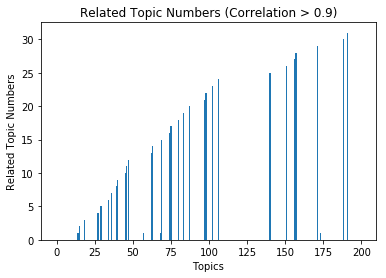

In [134]:
def corr_bar(cor_matrix, threshold,name):
    topic = []
    detail = []
    for i,row in enumerate(cor_matrix.values):
        topic.append(i)
        a = []
        for j in range(i):
            if abs(row[j]) > threshold:
                a.append(j)
        detail.append(a)
    num = [len(each) for each in detail]
    plt.bar(topic,num)
    plt.xlabel("Topics")
    plt.ylabel("Related Topic Numbers")
    plt.title("Related Topic Numbers (Correlation > {})".format(threshold))
    plt.savefig('{}_corr_bar_{}.pdf'.format(name,threshold))
    plt.show()
    return detail

info = corr_bar(cor_matrix,0.9,'old')

In [135]:
high = []
for i, row in enumerate(info):
    if row:
        high.append(i)
new_attri2 = new_attri
for i, col in enumerate(new_attri2.columns):
    if i in high:
        new_attri2 = new_attri2.drop(columns=col)
new_attri2.head(10)

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,...,topic_189,topic_190,topic_192,topic_193,topic_194,topic_195,topic_196,topic_197,topic_198,topic_199
0,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,...,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.047857
1,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,...,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152
2,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,...,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667
3,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,...,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500
4,0.000455,0.000455,0.000455,0.909545,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,...,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455
5,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,...,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667
6,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,...,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357,0.000357
7,0.000167,0.000167,0.000167,0.000167,0.966833,0.000167,0.000167,0.000167,0.000167,0.000167,...,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167,0.000167
8,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,...,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714,0.000714
9,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,...,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556


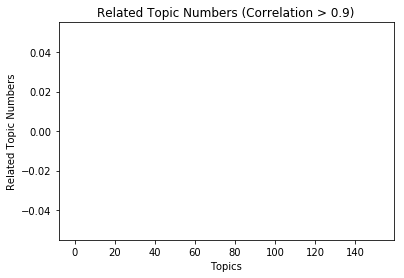

In [32]:
info = corr_bar(new_attri2.corr(),0.9,'new')

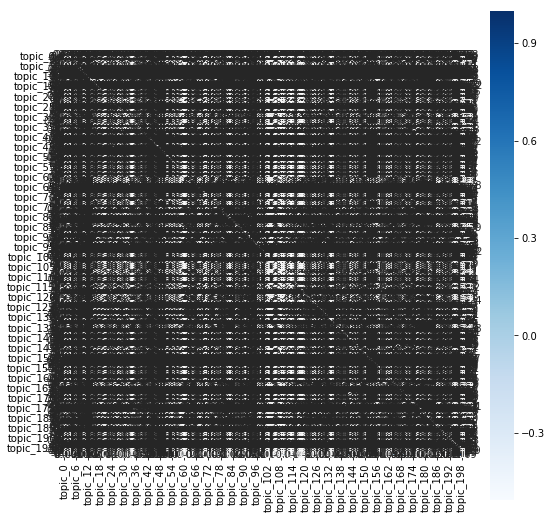

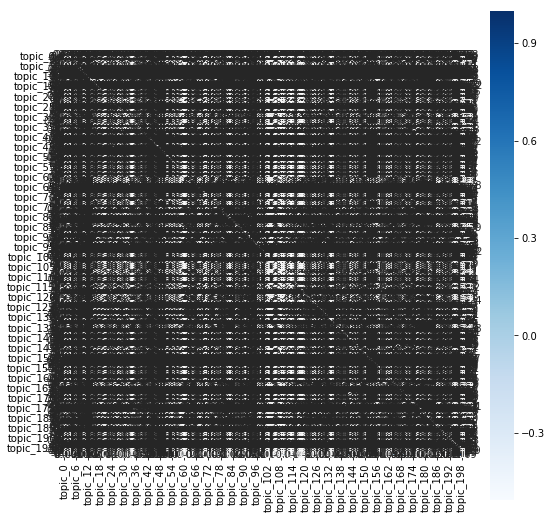

In [148]:
corr_hot(cor_matrix)

In [136]:
new_attri2.index

RangeIndex(start=0, stop=2425, step=1)

In [137]:
df_X = df_X.reset_index(drop=True)
df_X.index

RangeIndex(start=0, stop=2425, step=1)

In [138]:
df_X = pd.concat([df_X,new_attri2],axis=1)
df_X.head(5)

,content,mid,time,uid,cutted_content,interaction,sensitive,topic_0,topic_1,topic_2,...,topic_189,topic_190,topic_192,topic_193,topic_194,topic_195,topic_196,topic_197,topic_198,topic_199
0,然后我几个小时之前看了《About time》这部电影，发现主题曲就是这首歌，感觉很好。现在...,e0892171e0a5f1253384448d668e21cd,2015-03-20 01:16:28,493b4db0627a6b6ca5ddc475a0688a3e,几个 小时 About time 这部 电影 发现 主题曲 首歌 感觉 状态 享受 ...,1.0,0.999993,0.000238,0.000238,0.000238,...,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.047857
1,发表了博文《推荐一本书【一课经济学】》ByJSC_Blue最近在看一本经典的经济学入门数据，...,aa0dfc77cead179bb492abb376ac5d67,2015-04-30 21:37:04,b490b5dc3da6fb996af0512e9945b0d2,发表 博文 推荐 本书 一课 经济学 ByJSC Blue 一本 经典 经济学 入门 数...,0.0,1.000000,0.000152,0.000152,0.000152,...,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152
2,不就写代码儿么，在哪儿不能写，开心最好,9b0fc6510dafa91d44f13811156b081d,2015-04-17 22:07:11,8935fc324772cdce21a891ac23571391,写 代码 写 开心,0.0,0.909217,0.001667,0.001667,0.001667,...,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667
3,下班了～[泪],4bcc2f87b36a13afa21e150c1ccd4fd1,2015-05-18 05:56:28,da4c81d05820cc1692c23a09bd7bbb6d,下班 泪,0.0,0.934278,0.002500,0.002500,0.002500,...,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500
4,男子举报公务员与妻通奸 装定位仪捉奸 找到证据后就说不知道如何开口？呵呵 http://t....,13b7eba9cf8e88a76a49670c6bf5f6cb,2015-05-09 22:04:36,0cdf1500af3ad5afb787d432d0c25dd8,男子 举报 公务员 妻 通奸 装 定位仪 捉奸 找到 证据 说 开口 RAe...,0.0,0.053804,0.000455,0.000455,0.000455,...,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455


In [139]:
# clean time attribute
def time_tag(time):
    if 7<=int(time[-8:-6])<=12:
        return "morning"
    elif 12<int(time[-8:-6])<=18:
        return "afternoon"
    elif 18<int(time[-8:-6])<=24:
        return "evening"
    else:
        return "night"
    

In [140]:
df_X["time_type"] = df_X.time.apply(time_tag)

In [141]:
# one hot encode
time = pd.get_dummies(df_X["time_type"],prefix="time_")
df_X = pd.concat([df_X,time],axis=1)
df_X.head(5)

,content,mid,time,uid,cutted_content,interaction,sensitive,topic_0,topic_1,topic_2,...,topic_195,topic_196,topic_197,topic_198,topic_199,time_type,time__afternoon,time__evening,time__morning,time__night
0,然后我几个小时之前看了《About time》这部电影，发现主题曲就是这首歌，感觉很好。现在...,e0892171e0a5f1253384448d668e21cd,2015-03-20 01:16:28,493b4db0627a6b6ca5ddc475a0688a3e,几个 小时 About time 这部 电影 发现 主题曲 首歌 感觉 状态 享受 ...,1.0,0.999993,0.000238,0.000238,0.000238,...,0.000238,0.000238,0.000238,0.000238,0.047857,night,0,0,0,1
1,发表了博文《推荐一本书【一课经济学】》ByJSC_Blue最近在看一本经典的经济学入门数据，...,aa0dfc77cead179bb492abb376ac5d67,2015-04-30 21:37:04,b490b5dc3da6fb996af0512e9945b0d2,发表 博文 推荐 本书 一课 经济学 ByJSC Blue 一本 经典 经济学 入门 数...,0.0,1.000000,0.000152,0.000152,0.000152,...,0.000152,0.000152,0.000152,0.000152,0.000152,evening,0,1,0,0
2,不就写代码儿么，在哪儿不能写，开心最好,9b0fc6510dafa91d44f13811156b081d,2015-04-17 22:07:11,8935fc324772cdce21a891ac23571391,写 代码 写 开心,0.0,0.909217,0.001667,0.001667,0.001667,...,0.001667,0.001667,0.001667,0.001667,0.001667,evening,0,1,0,0
3,下班了～[泪],4bcc2f87b36a13afa21e150c1ccd4fd1,2015-05-18 05:56:28,da4c81d05820cc1692c23a09bd7bbb6d,下班 泪,0.0,0.934278,0.002500,0.002500,0.002500,...,0.002500,0.002500,0.002500,0.002500,0.002500,night,0,0,0,1
4,男子举报公务员与妻通奸 装定位仪捉奸 找到证据后就说不知道如何开口？呵呵 http://t....,13b7eba9cf8e88a76a49670c6bf5f6cb,2015-05-09 22:04:36,0cdf1500af3ad5afb787d432d0c25dd8,男子 举报 公务员 妻 通奸 装 定位仪 捉奸 找到 证据 说 开口 RAe...,0.0,0.053804,0.000455,0.000455,0.000455,...,0.000455,0.000455,0.000455,0.000455,0.000455,evening,0,1,0,0


In [142]:
# drop unnecessary attribute
df_X = df_X.drop(columns = "content")
df_X = df_X.drop(columns = "time_type")
df_X = df_X.drop(columns = "cutted_content")
df_X = df_X.drop(columns = "mid")
df_X = df_X.drop(columns = "uid")
df_X = df_X.drop(columns = "time")
df_X.head(5)

,interaction,sensitive,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,...,topic_194,topic_195,topic_196,topic_197,topic_198,topic_199,time__afternoon,time__evening,time__morning,time__night
0,1.0,0.999993,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,...,0.000238,0.000238,0.000238,0.000238,0.000238,0.047857,0,0,0,1
1,0.0,1.000000,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,...,0.000152,0.000152,0.000152,0.000152,0.000152,0.000152,0,1,0,0
2,0.0,0.909217,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,...,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0,1,0,0
3,0.0,0.934278,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,...,0.002500,0.002500,0.002500,0.002500,0.002500,0.002500,0,0,0,1
4,0.0,0.053804,0.000455,0.000455,0.000455,0.909545,0.000455,0.000455,0.000455,0.000455,...,0.000455,0.000455,0.000455,0.000455,0.000455,0.000455,0,1,0,0


In [143]:
train_X,test_X, train_label, test_label = cross_validation.train_test_split(df_X, df_label, test_size=0.1, random_state=0)
train_X.shape

(2182, 172)

In [144]:
train_label.shape

(2182, 3)

In [145]:
train_X,validation_X, train_label, validation_label = cross_validation.train_test_split(train_X, train_label, test_size=0.2, random_state=0)
validation_X.shape

(437, 172)

In [146]:
test_X.shape

(243, 172)

In [147]:
cad = []
import random
for i in range(train_label.shape[0]):
    if sum(train_label.iloc[i].values) == 0:
        cad.append(train_label.index[i])
random.shuffle(cad)
cd = cad[:int(len(cad)*0.25)]

In [148]:
for i in cd:
    train_X = train_X.drop(i)
    train_label = train_label.drop(i)
train_X.shape

(1470, 172)

In [149]:
cad = []
import random
for i in range(validation_X.shape[0]):
    if sum(validation_label.iloc[i].values) == 0:
        cad.append(validation_label.index[i])
random.shuffle(cad)
cd = cad[:70]

In [150]:
for i in cd:
    validation_X = validation_X.drop(i)
    validation_label = validation_label.drop(i)
validation_X.shape

(367, 172)

In [151]:
# assessment
def forward_dev(prev,real):
    return abs(prev-real)/(real+5)
def comment_dev(prev,real):
    return abs(prev-real)/(real+3)
def like_dev(prev,real):
    return abs(prev-real)/(real+3)
def each_precision(fdev,cdev,ldev):
    return 1-0.5*fdev-0.25*cdev-0.25*ldev
def sgn(x):
    if x>0:
        return 1
    else:
        return 0

def precision(prev,real):
    up = 0
    low = 0
    for i in range(len(prev)):
        row = sum(real[i])+1
        fd = forward_dev(prev[i][1],real[i][1])
        cd = forward_dev(prev[i][0],real[i][0])
        ld = forward_dev(prev[i][2],real[i][2])
        up += row*each_precision(fd,cd,ld)
        low += row
    return up/low
        

In [568]:
# training with svm
def svm(ker,c):
    # using Label Powerset
    from skmultilearn.problem_transform import LabelPowerset
    from sklearn.svm import SVC

    # initialize Label Powerset multi-label classifier
    # with a gaussian naive bayes base classifier
    classifier = LabelPowerset(SVC(kernel = ker,C=c))
    # train
    classifier.fit(train_X,train_label)

#     predict
    predictions1 = classifier.predict(train_X)
    pred1 = predictions1.toarray()
    valid = train_label.values
    predictions2= classifier.predict(validation_X)
    pred2= predictions2.toarray()
    test = validation_label.values
    print("kernel:",ker,"C:",c)
#     print("validation accuracy",precision(pred1,valid))
#     print("test accuracy",precision(pred2,test))
#     predictions = classifier.predict(validation_X)
    from sklearn import metrics
#     print("kernel:",ker,"C:",c)
    print("train accuracy",metrics.accuracy_score(valid.ravel(), pred1.ravel()))
    print("validation accuracy",metrics.accuracy_score(test.ravel(),pred2.ravel()))

In [569]:
kernal = ["linear","poly","rbf","sigmoid"]
C = [0.01,0.05,0.1,0.5,1,5,10]
for each in kernal:
    for c in C:
        svm(each,c)

kernel: linear C: 0.01
train accuracy 0.743990929705
validation accuracy 0.782924613987
kernel: linear C: 0.05
train accuracy 0.743990929705
validation accuracy 0.782924613987
kernel: linear C: 0.1
train accuracy 0.743990929705
validation accuracy 0.782924613987
kernel: linear C: 0.5
train accuracy 0.743990929705
validation accuracy 0.782924613987
kernel: linear C: 1
train accuracy 0.743990929705
validation accuracy 0.78110808356
kernel: linear C: 5
train accuracy 0.746712018141
validation accuracy 0.777475022707
kernel: linear C: 10
train accuracy 0.746031746032
validation accuracy 0.776566757493
kernel: poly C: 0.01
train accuracy 0.743990929705
validation accuracy 0.782924613987
kernel: poly C: 0.05
train accuracy 0.743990929705
validation accuracy 0.782924613987
kernel: poly C: 0.1
train accuracy 0.743990929705
validation accuracy 0.782924613987
kernel: poly C: 0.5
train accuracy 0.743990929705
validation accuracy 0.782924613987
kernel: poly C: 1
train accuracy 0.743990929705
valid

In [572]:
# training with logistic
def logistic(c,sol):
    # using Label Powerset
    from skmultilearn.problem_transform import LabelPowerset
    from sklearn.linear_model import LogisticRegression

    # initialize Label Powerset multi-label classifier
    # with a gaussian naive bayes base classifier
    classifier = LabelPowerset(LogisticRegression(C=c,solver=sol))
    # train
    classifier.fit(train_X,train_label)

#     predict
    predictions1 = classifier.predict(train_X)
    pred1 = predictions1.toarray()
    valid = train_label.values
    predictions2= classifier.predict(validation_X)
    pred2= predictions2.toarray()
    test = validation_label.values
    print("solver:",sol,"C:",c)
#     print("validation accuracy",precision(pred1,valid))
#     print("test accuracy",precision(pred2,test))
#     predictions = classifier.predict(validation_X)
    from sklearn import metrics
#     print("kernel:",ker,"C:",c)
    print("train accuracy",metrics.accuracy_score(valid.ravel(), pred1.ravel()))
    print("validation accuracy",metrics.accuracy_score(test.ravel(),pred2.ravel()))

In [573]:
solver = ["newton-cg","lbfgs","liblinear","sag","saga"]
C = [0.01,0.05,0.1,0.5,1,5,10]
for each in solver:
    for c in C:
        logistic(c,each)

solver: newton-cg C: 0.01
train accuracy 0.743990929705
validation accuracy 0.782924613987
solver: newton-cg C: 0.05
train accuracy 0.743990929705
validation accuracy 0.782924613987
solver: newton-cg C: 0.1
train accuracy 0.743990929705
validation accuracy 0.782924613987
solver: newton-cg C: 0.5
train accuracy 0.743990929705
validation accuracy 0.782924613987
solver: newton-cg C: 1
train accuracy 0.743764172336
validation accuracy 0.782924613987
solver: newton-cg C: 5
train accuracy 0.738775510204
validation accuracy 0.767484105359
solver: newton-cg C: 10
train accuracy 0.740362811791
validation accuracy 0.764759309718
solver: lbfgs C: 0.01
train accuracy 0.743990929705
validation accuracy 0.782924613987
solver: lbfgs C: 0.05
train accuracy 0.743990929705
validation accuracy 0.782924613987
solver: lbfgs C: 0.1
train accuracy 0.743990929705
validation accuracy 0.782924613987
solver: lbfgs C: 0.5
train accuracy 0.743990929705
validation accuracy 0.782924613987
solver: lbfgs C: 1
train ac

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


solver: saga C: 10
train accuracy 0.740362811791
validation accuracy 0.764759309718


In [152]:
def randforest(validation_X,validation_label,estimator=None,feature=None,depth=None):
    from skmultilearn.problem_transform import LabelPowerset
    from sklearn.ensemble import RandomForestClassifier

        # initialize Label Powerset multi-label classifier
        # with a gaussian naive bayes base classifier
    classifier = LabelPowerset(RandomForestClassifier(n_estimators = estimator, max_features = feature,max_depth =depth))
        # train
    classifier.fit(train_X,train_label)

        # predict
        # predictions = classifier.predict(validation_X)
        # pred = predictions.toarray()
        # valid = validation_label.values
        # precision(pred,valid)
    predictions = classifier.predict(validation_X)
    from sklearn import metrics
    return metrics.accuracy_score(validation_label.values.ravel(), predictions.toarray().ravel())

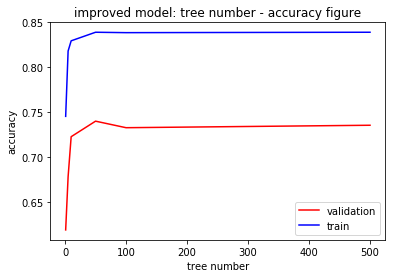

[0.6194368755676658, 0.67847411444141692, 0.72297910990009084, 0.74023614895549505, 0.73297002724795646, 0.73569482288828336]


In [153]:
est = [1,5,10,50,100,500]
feature = ["sqrt","log2",None]
depth = [1,5,10,50,100,500]
vali_tree_accuracy = []
train_tree_accuracy = []
for tree in est:
    vali_tree_accuracy.append(randforest(validation_X,validation_label,estimator=tree,feature=None,depth=None))
    train_tree_accuracy.append(randforest(train_X,train_label,estimator=tree,feature=None,depth=None))
plt.plot(est,vali_tree_accuracy,'r',label = 'validation')
plt.plot(est,train_tree_accuracy,'b',label = 'train')
plt.title('improved model: tree number - accuracy figure')  
plt.xlabel('tree number')  
plt.ylabel('accuracy') 
plt.legend()
plt.savefig("new_treenum.pdf",dpi = 100)
plt.show()
print(vali_tree_accuracy)

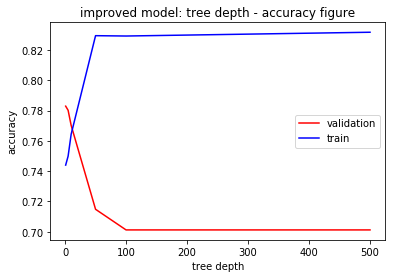

In [154]:
vali_tree_accuracy = []
train_tree_accuracy = []
for dp in depth:
    vali_tree_accuracy.append(randforest(validation_X,validation_label,estimator=10,feature=None,depth=dp))
    train_tree_accuracy.append(randforest(train_X,train_label,estimator=10,feature=None,depth=dp))
plt.plot(est,vali_tree_accuracy,'r',label = 'validation')
plt.plot(est,train_tree_accuracy,'b',label = 'train')
plt.title('improved model: tree depth - accuracy figure')  
plt.xlabel('tree depth')  
plt.ylabel('accuracy')  
plt.legend()
plt.savefig("new_depth.pdf",dpi = 100)
plt.show()

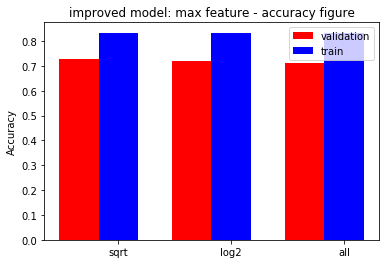

In [155]:
import numpy as np
vali_tree_accuracy = []
test_tree_accuracy = []
feature = ["sqrt","log2",None]
for dp in feature:
    vali_tree_accuracy.append(randforest(validation_X,validation_label,estimator=10,feature=dp,depth=None))
    test_tree_accuracy.append(randforest(train_X,train_label,estimator=10,feature=dp,depth=None))
    
ind = np.arange(3) 
width = 0.35       
fig, ax = plt.subplots()
ax.bar(ind, vali_tree_accuracy, width, color='r', label = 'validation')
ax.bar(ind + width, test_tree_accuracy, width, color='b', label = 'train')
# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy')
ax.set_title('improved model: max feature - accuracy figure')
ax.set_xticks(ind + width)
ax.set_xticklabels(("sqrt","log2","all"))
plt.legend()
plt.savefig("new_feature.pdf",dpi = 100)
plt.show()

In [156]:
randforest(test_X,test_label,estimator=50,feature='log2',depth=50)

0.72565157750342935

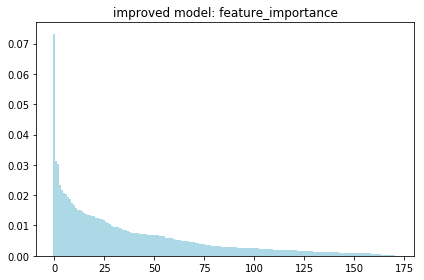

In [157]:
from skmultilearn.problem_transform import LabelPowerset
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 5, max_features = 'log2',max_depth =50)
classifier.fit(train_X,train_label)
predictions = classifier.predict(validation_X)
importance = classifier.feature_importances_
indices = np.argsort(importance)[::-1]
plt.title("improved model: feature_importance")
plt.bar(range(train_X.shape[1]),importance[indices],color='lightblue',align='center')
plt.tight_layout()
plt.savefig("new_feature_importance.pdf")
plt.show()

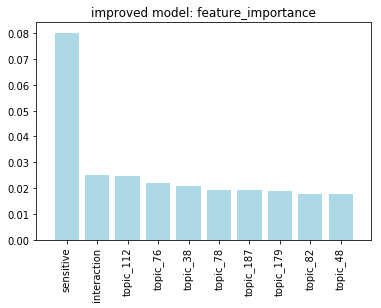

In [158]:
from skmultilearn.problem_transform import LabelPowerset
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
def top_k(num):
    classifier = RandomForestClassifier(n_estimators = 50, max_features = 'log2',max_depth =50)
    classifier.fit(train_X,train_label)
    predictions = classifier.predict(validation_X)
    importance = classifier.feature_importances_
    ind = np.argsort(importance)[::-1]
    indices = ind[:num]

    plt.title("improved model: feature_importance")
    plt.bar(range(num),importance[indices],color='lightblue',align='center')

    names = [train_X.columns[:][index] for index in indices]
    plt.xticks(range(num),names,rotation = 90)
    plt.xlim([-1,num])
    plt.savefig("new_top_{}_importance.pdf".format(num))
    plt.show()
    
top_k(10)

In [159]:
def topk_name(thres):
    classifier = RandomForestClassifier(n_estimators = 50, max_features = 'log2',max_depth =50)
    classifier.fit(train_X,train_label)
    predictions = classifier.predict(validation_X)
    importance = classifier.feature_importances_
    ind = np.argsort(importance)[::-1]
    cnt = 0
    name = [train_X.columns[:][index] for index in indices]
    for i in ind:
        cnt+=importance[i]
        if cnt < thres:
            name.remove(train_X.columns[:][i])
        else:
            break\
    return name

SyntaxError: invalid syntax (<ipython-input-159-db50b9d2f09a>, line 14)

In [ ]:
def forest_threstrain(thres):
    drop_name = topk_name(thres)
    trnX = train_X
    tstX = test_X
    vldX = validation_X
    for each in drop_name:
        trnX = trnX.drop(columns = each)
        tstX = tstX.drop(columns = each)
        vldX = vldX.drop(columns = each)

    classifier = LabelPowerset(RandomForestClassifier(n_estimators = 50,max_depth =50))
    classifier.fit(trnX,train_label)
    predictions1 = classifier.predict(trnX)
    pred1 = predictions1.toarray()
    train = train_label.values
    predictions2= classifier.predict(vldX)
    pred2= predictions2.toarray()
    valid = validation_label.values
    from sklearn import metrics
    return metrics.accuracy_score(train.ravel(),pred1.ravel()), metrics.accuracy_score(valid.ravel(),pred2.ravel())
    

In [ ]:
vald = []
tst = []
for each in range(45,100,5):
    thres = (each+5)/100
    print(thres)
    v,t = forest_threstrain(thres)
    print(v,t)
    vald.append(v)
    tst.append(t)

In [ ]:
est = [(each+5)/100 for each in range(45,100,5)]
plt.plot(est,vald,'r',label = 'train')
plt.plot(est,tst,'b',label = 'validation')
plt.title('improved model: impoortance threshold - accuracy figure')  
plt.xlabel('threshold')  
plt.ylabel('accuracy')  
plt.legend()
plt.savefig("new_importance_thres.pdf")
plt.show()